## I. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

['.DS_Store', '.ipynb_checkpoints', 'app.py', 'heart.csv', 'Heart_disease_prediction.ipynb', 'rf_model.pkl']


## II. Importing dataset 

In [4]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [7]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [10]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [13]:
dataset.head(5)

,age,gender,chest pain,resting blood pressure,cholestrol,fasting blood sugar,electrocardiographic,max. heart rate,exang,oldpeak,slope,coronary artery,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
dataset.tail(5)

,age,gender,chest pain,resting blood pressure,cholestrol,fasting blood sugar,electrocardiographic,max. heart rate,exang,oldpeak,slope,coronary artery,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### Description

In [18]:
dataset.describe()

,age,gender,chest pain,resting blood pressure,cholestrol,fasting blood sugar,electrocardiographic,max. heart rate,exang,oldpeak,slope,coronary artery,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   gender                  303 non-null    int64  
 2   chest pain              303 non-null    int64  
 3   resting blood pressure  303 non-null    int64  
 4   cholestrol              303 non-null    int64  
 5   fasting blood sugar     303 non-null    int64  
 6   electrocardiographic    303 non-null    int64  
 7   max. heart rate         303 non-null    int64  
 8   exang                   303 non-null    int64  
 9   oldpeak                 303 non-null    float64
 10  slope                   303 non-null    int64  
 11  coronary artery         303 non-null    int64  
 12  thalassemia             303 non-null    int64  
 13  target                  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

#### Let's understand our columns better:

In [23]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestrol in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-4) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
gender:			1: male, 0: female
chest pain:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
resting blood pressure:			resting blood pressure
cholestrol:			 serum cholestrol in mg/dl
fasting blood sugar:			fasting blood sugar > 120 mg/dl
electrocardiographic:			resting electrocardiographic results (values 0,1,2)
max. heart rate:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
coronary artery:			number of major vessels (0-4) colored by flourosopy
thalassemia:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [26]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [28]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [32]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                    1.000000
exang                     0.436757
chest pain                0.433798
oldpeak                   0.430696
max. heart rate           0.421741
coronary artery           0.391724
slope                     0.345877
thalassemia               0.344029
gender                    0.280937
age                       0.225439
resting blood pressure    0.144931
electrocardiographic      0.137230
cholestrol                0.085239
fasting blood sugar       0.028046
Name: target, dtype: float64


In [34]:
#This shows that most columns are moderately correlated with target, but 'fasting blood sugar' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\962781673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=["blue", "orange"])


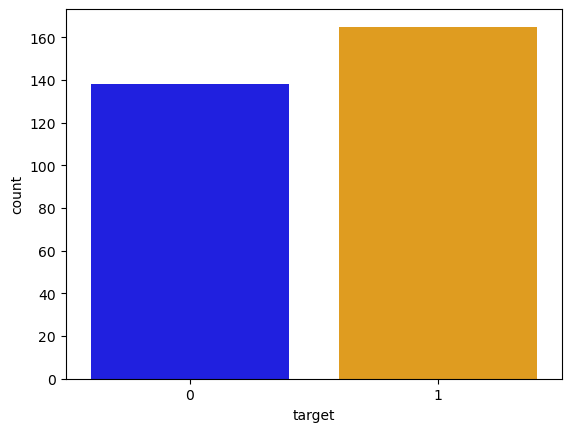

In [38]:
y = dataset["target"]

sns.countplot(x=y, palette=["blue", "orange"])


target_temp = dataset.target.value_counts()

print(target_temp)
plt.show()

In [40]:
# Calculate percentages
percentage_without_heart_problems = round(target_temp[0] * 100 / 303, 2)
percentage_with_heart_problems = round(target_temp[1] * 100 / 303, 2)

# Print results
print(f"Percentage of patients without heart problems: {percentage_without_heart_problems}%")
print(f"Percentage of patients with heart problems: {percentage_with_heart_problems}%")


Percentage of patients without heart problems: 45.54%
Percentage of patients with heart problems: 54.46%


### We'll analyse 'gender', 'chest pain', 'fasting blood sugar', 'electrocardiographic', 'exang', 'slope', 'coronary artery' and 'thalassemia' features

### Analysing the 'gender' feature

In [44]:
dataset["gender"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\4255378464.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='gender', y='target', ci=None,
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\4255378464.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='gender', y='target', ci=None,


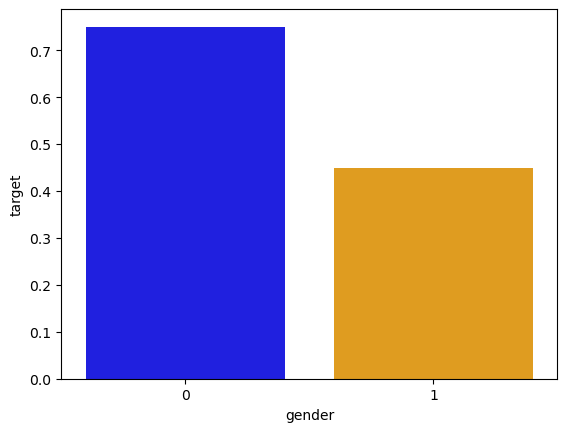

In [47]:
sns.barplot(data=dataset, x='gender', y='target', ci=None, 
            palette={'0': 'blue', '1': 'orange'})
plt.show()


##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [51]:
dataset["chest pain"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the chest pain feature has values from 0 to 3

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1026645794.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='chest pain', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow'})
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1026645794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='chest pain', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow'})


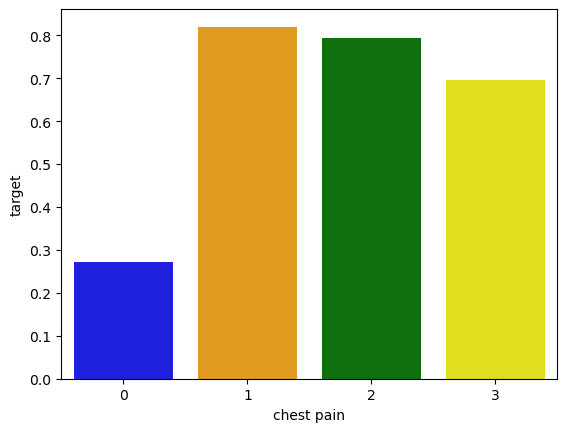

In [54]:
sns.barplot(data=dataset, x='chest pain', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow'})
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the fasting blood sugar feature

In [58]:
dataset["fasting blood sugar"].unique()

array([1, 0], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1605608787.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='fasting blood sugar', y='target', ci=None,
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1605608787.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='fasting blood sugar', y='target', ci=None,


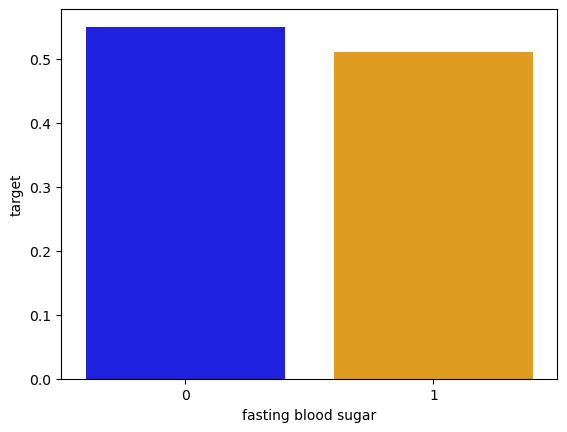

In [60]:
sns.barplot(data=dataset, x='fasting blood sugar', y='target', ci=None, 
            palette={'0': 'blue', '1': 'orange'})
plt.show()

##### Nothing extraordinary here slightly difference represent


### Analysing the electrocardiographic feature

In [64]:
dataset["electrocardiographic"].unique()

array([0, 1, 2], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3152653611.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='electrocardiographic', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green'})
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3152653611.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='electrocardiographic', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green'})


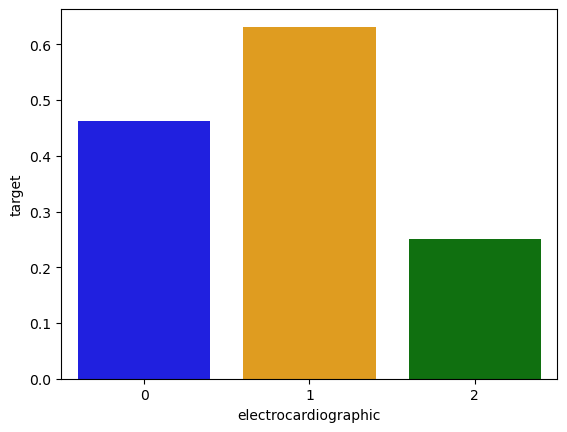

In [66]:
sns.barplot(data=dataset, x='electrocardiographic', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green'})
plt.show()

##### This plot represent that people with electrocardiographic '1' and '0' are much more likely to have a heart disease as compare to electrocardiographic '2'

### Analysing the 'exang' feature

In [70]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1605608787.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='fasting blood sugar', y='target', ci=None,
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1605608787.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='fasting blood sugar', y='target', ci=None,


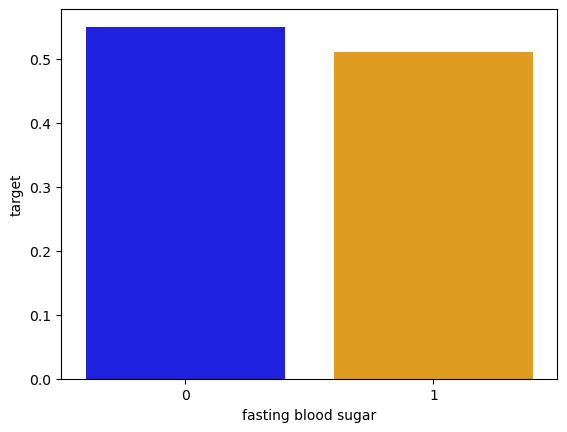

In [72]:
sns.barplot(data=dataset, x='fasting blood sugar', y='target', ci=None, 
            palette={'0': 'blue', '1': 'orange'})
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [76]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3168092496.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='slope', y='target', ci=None,
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\3168092496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='slope', y='target', ci=None,


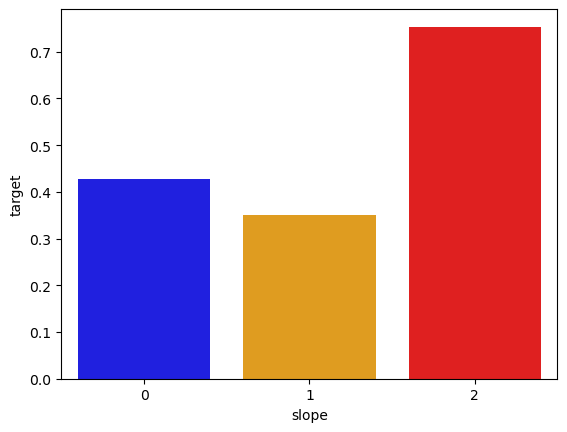

In [78]:
sns.barplot(data=dataset, x='slope', y='target', ci=None, 
            palette={'0': 'blue', '1': 'orange', '2': 'red'})
plt.show()

##### We observe, that Slope '2' causes heart problem much more than Slope '0' and '1'

### Analysing the 'coronary artery' feature

In [82]:
#number of major vessels (0-4) colored by flourosopy

In [84]:
dataset["coronary artery"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1738996449.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='coronary artery', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow', '4':'red'})
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\1738996449.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='coronary artery', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow', '4':'red'})


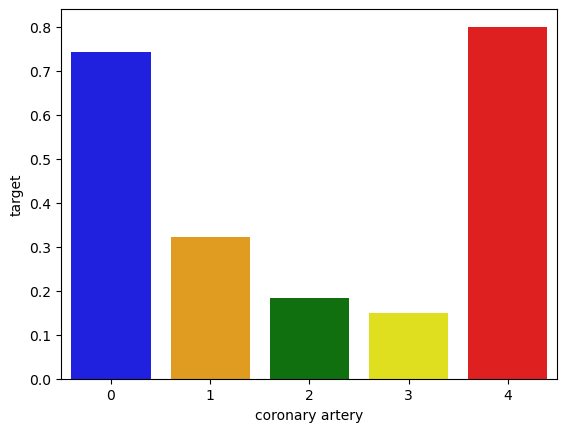

In [86]:
sns.barplot(data=dataset, x='coronary artery', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow', '4':'red'})
plt.show()

##### coronary artery=0, 4 has large number of heart patients

In [89]:
### Analysing the 'thalassemia' feature

In [91]:
dataset["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\4290471435.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='thalassemia', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow'})
C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\4290471435.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='thalassemia', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow'})


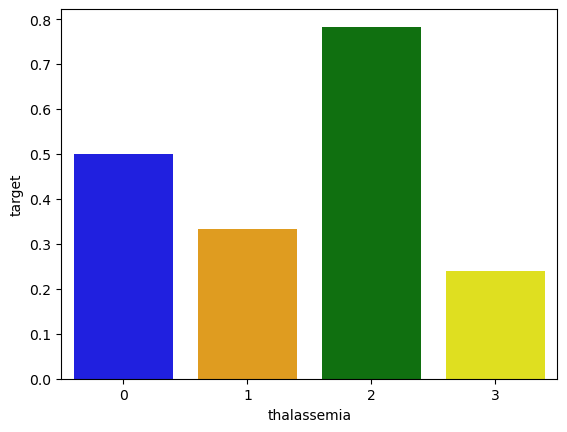

In [93]:
sns.barplot(data=dataset, x='thalassemia', y='target', ci=None,  palette={'0': 'blue', '1': 'orange', '2':'green' ,'3':'yellow'})
plt.show()

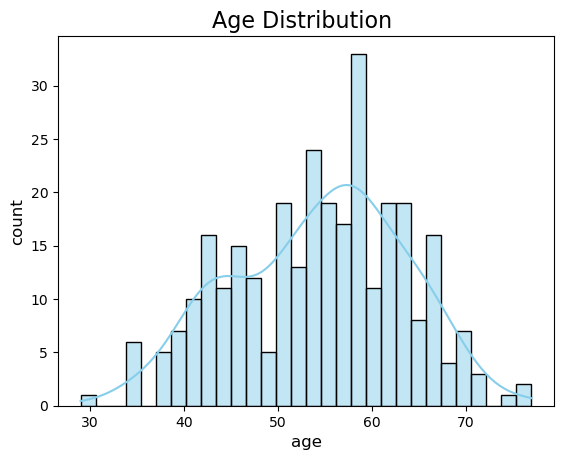

In [95]:
# Create a histogram with KDE for the "age" feature
sns.histplot(data=dataset, x="age", kde=True, color="skyblue", bins=30)
# Add title
plt.title("Age Distribution ", fontsize=16)
plt.xlabel("age", fontsize=12)
plt.ylabel("count", fontsize=12)

# Display the plot
plt.show()

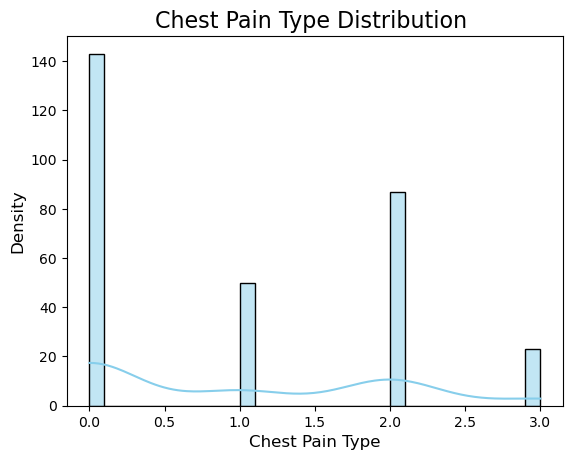

In [96]:
# Create a histogram with KDE for the "chest pain" feature
sns.histplot(data=dataset, x="chest pain", kde=True, color="skyblue", bins=30)

# Add title
plt.title("Chest Pain Type Distribution ", fontsize=16)
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Display the plot
plt.show()

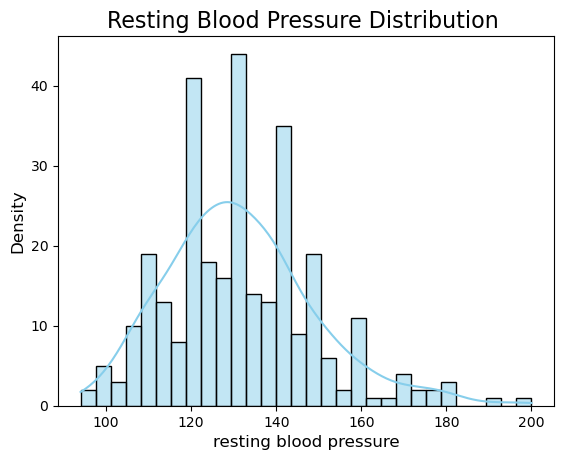

In [99]:
# Create a histogram with KDE for the "resting blood pressure" feature
sns.histplot(data=dataset, x="resting blood pressure", kde=True, color="skyblue", bins=30)

# Add title
plt.title("Resting Blood Pressure Distribution ", fontsize=16)
plt.xlabel("resting blood pressure", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Display the plot
plt.show()

## IV. Train Test split

In [102]:
from sklearn.model_selection import train_test_split

# Separating predictors (features) and target (label)
X = dataset.drop("target", axis=1)  # Drop the "target" column to get predictors
y = dataset["target"]              # Select the "target" column as the label

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Display the shapes of the splits for confirmation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (242, 13)
X_test shape: (61, 13)
Y_train shape: (242,)
Y_test shape: (61,)


## V. Model Fitting

In [106]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with default parameters
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Predict the target values for the test set
predictions = model.predict(X_test)

# Display the predicted values 
print("Predicted values:", predictions)


Predicted values: [0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
predictions.shape

(61,)

In [114]:
score_lr = round(accuracy_score(predictions,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### SVM

In [117]:
from sklearn import svm

# Initialize SVM with a linear kernel
sv = svm.SVC(kernel='linear')

# Fit the model on the training data
sv.fit(X_train, Y_train)

# Predict on the test data
Y_pred_svm = sv.predict(X_test)

# Display the predicted values 
print("Predicted values:", Y_pred_svm)


Predicted values: [0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [118]:
Y_pred_svm.shape

(61,)

In [121]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [124]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with n_neighbors=7
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model on the training data
knn.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_knn = knn.predict(X_test)

# Display the predicted values 
print("Predicted values:", Y_pred_knn)


Predicted values: [0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [126]:
Y_pred_knn.shape

(61,)

In [128]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)  

# Fit the model on the training data
dt.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_dt = dt.predict(X_test)

# Display the predicted values 
print("Predicted values:", Y_pred_dt)


Predicted values: [0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]


In [133]:
print(Y_pred_dt.shape)

(61,)


In [135]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with n_estimators=100 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = rf.predict(X_test)

# Display the predicted values 
print("Predicted values:", Y_pred_rf)


Predicted values: [0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [139]:
Y_pred_rf.shape

(61,)

In [142]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 85.25 %


## VI. Output final score

In [145]:
# List of accuracy scores for each model
scores = [score_lr, score_svm, score_knn, score_dt, score_rf]

# List of algorithm names
algorithms = ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

# Loop through each algorithm and display the corresponding accuracy score
for i in range(len(algorithms)):
    print(f"The accuracy score achieved using {algorithms[i]} is: {scores[i]:.2f} %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using Random Forest is: 85.25 %


C:\Users\DELL\AppData\Local\Temp\ipykernel_14392\2708021596.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=algorithms, y=scores, palette="viridis")


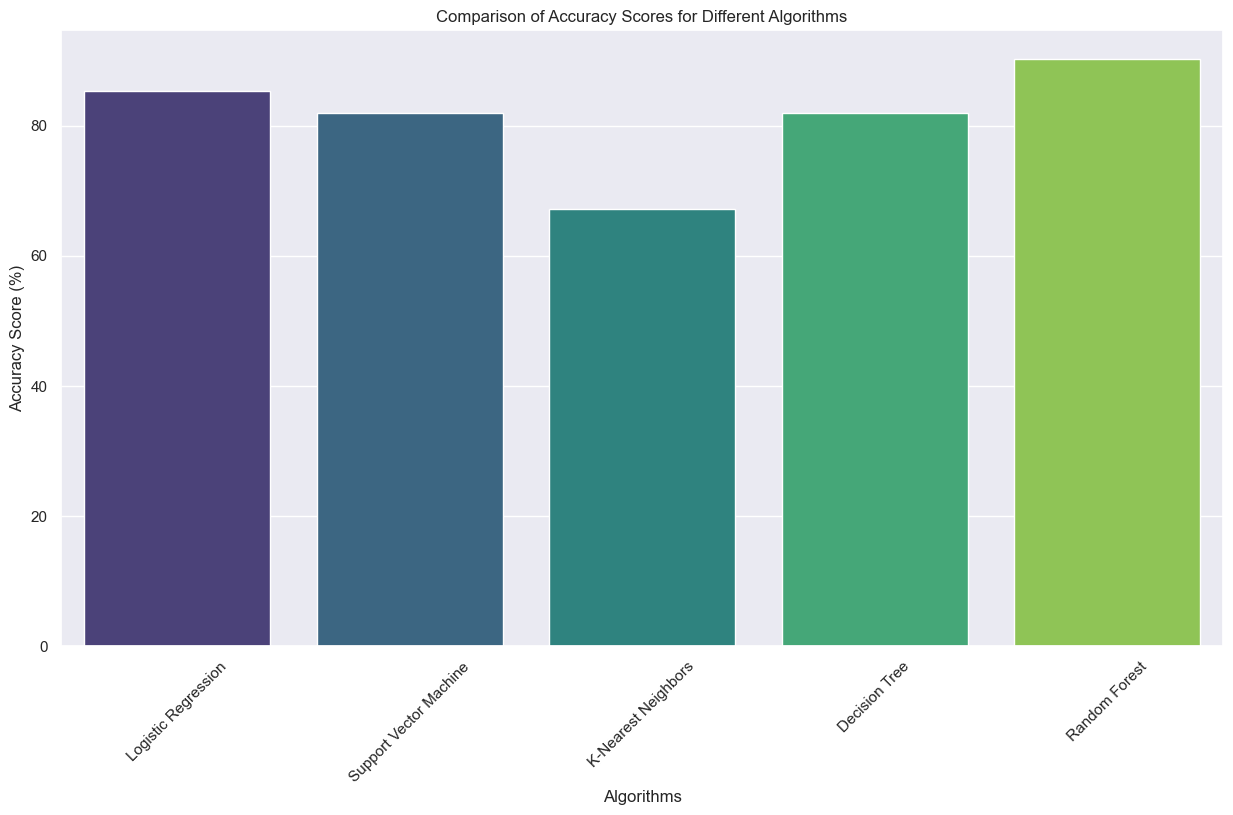

In [147]:
# Data
scores = [85.25, 81.97, 67.21, 81.97, 90.16]
algorithms = ["Logistic Regression", "Support Vector Machine", 
              "K-Nearest Neighbors", "Decision Tree", "Random Forest"]

# Set the figure size
sns.set(rc={'figure.figsize': (15, 8)})

# Plot
sns.barplot(x=algorithms, y=scores, palette="viridis")

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score (%)")
plt.title("Comparison of Accuracy Scores for Different Algorithms")
plt.xticks(rotation=45)
plt.show()

### There random forest has good result as compare to other algorithms <br> <br>

In [150]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
dataset = pd.read_csv("heart.csv")
X = dataset.drop('target', axis=1)
y = dataset['target']

# Split and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']